# Basic Operations in Keras

In [341]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

## 1. Zero Padding

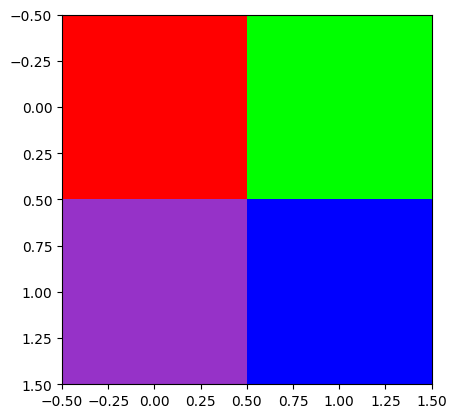

In [342]:
# example gray scale image
x = np.array([[[[0], [1]], [[0], [1]]]])

# show img using matplotlib
#plt.imshow(x[0,:,:,0], cmap='gray')

# image wiht rgb channels with red, green and blue values
x = np.array([[[[255, 0, 0], [0, 255, 0]], [[150, 50, 200], [0, 0, 255]]]])
# show img using matplotlib
plt.imshow(x[0,:,:,:]) # here 0 is the batch size, 0th image, all rows, all columns, all channels

tf.Tensor(
[[[[  0   0   0]
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]]

  [[  0   0   0]
   [  0   0   0]
   [255   0   0]
   [  0 255   0]
   [  0   0   0]
   [  0   0   0]]

  [[  0   0   0]
   [  0   0   0]
   [150  50 200]
   [  0   0 255]
   [  0   0   0]
   [  0   0   0]]

  [[  0   0   0]
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]]]], shape=(1, 4, 6, 3), dtype=int32)


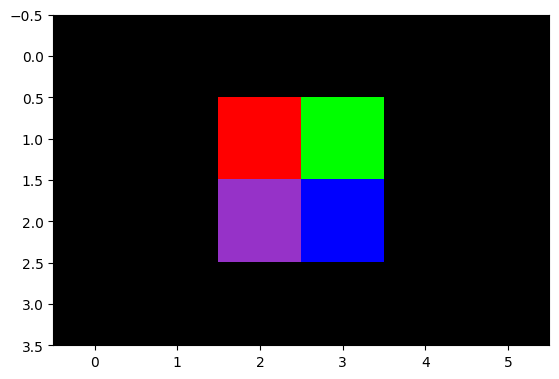

In [343]:
# now padd the image
x_pad = tf.keras.layers.ZeroPadding2D(padding=(1,2))(x) # here (1,3) means pad 1 row on top, 1 row on bottom, 2 columns on left, 2 columns on right
plt.imshow(x_pad[0,:,:,:]) # here 0 is the batch size, 0th image, all rows, all columns, all channels
print(x_pad)

## 2. Convolution

(1, 28, 28, 1)
(1, 26, 26, 1)


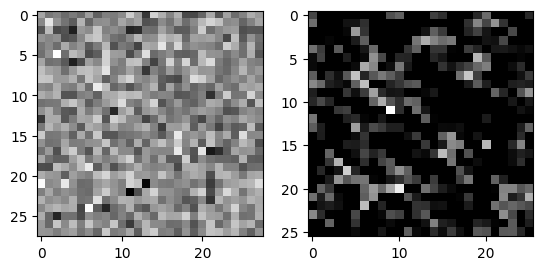

In [344]:
# Conv2D layer
# input shape (batch_size, height, width, channels)
# filters: number of filters
# kernel_size: filter size
# strides: number of pixels to slide the filter
# padding: valid or same
# activation: activation function
# use_bias: use bias or not

#example
input_shape = (1, 28, 28, 1)
x = np.random.randn(1, 28, 28, 1)
print(x.shape)

# create a Conv2D layer
conv = tf.keras.layers.Conv2D(filters=1, 
                              kernel_size=(3,3), 
                              strides=(1,1), 
                              padding='valid', 
                              activation='relu', 
                              use_bias=True, 
                              input_shape=(28, 28, 1))

# here input_shape[1:] means (28, 28, 1) which is the shape of the input image

# apply the Conv2D layer
x_conv = conv(x)
print(x_conv.shape)

# show both images
plt.subplot(1, 2, 1)
plt.imshow(x[0,:,:,0], cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(x_conv[0,:,:,0], cmap='gray')
plt.show()

# NOTE: The convoluted image extracted the darker regions of the image

orig shape: (417, 626, 3)
resized shape: (256, 256, 3)


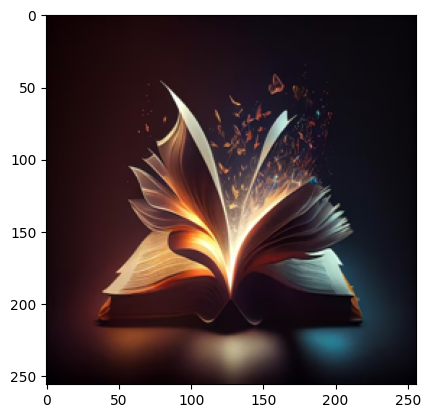

In [345]:
# apply conv to smaple image
# load image
sample_book_img = Image.open('C:\\Users\\kruth\\OneDrive\\Desktop\\DL_basics\\sample_images\\sample_book_img.png')
x_book = np.array(sample_book_img)
print("orig shape:", x_book.shape)

# resize image to 256x256
x_book = np.array(sample_book_img.resize((256, 256)))
print("resized shape:", x_book.shape)

# normalize image
x_book = x_book / 255.0

# show image
plt.imshow(x_book)

conv shape: (1, 127, 127, 1)


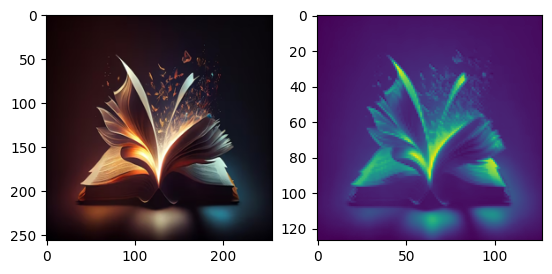

In [346]:
# use conv layer to extract features
x_book = x_book.reshape((1, 256, 256, 3)) # reshape to (batch_size, height, width, channels)
x_book = x_book.astype(np.float32) # convert to float32

# define the conv layer
conv_book = tf.keras.layers.Conv2D(filters=1, 
                                   kernel_size=(3,3), 
                                   strides=(2,2), 
                                   padding='valid', 
                                   activation='relu', 
                                   use_bias=True, 
                                   input_shape=(256, 256, 3))

# filters = 1 means the output will be a single channel image
# kernel_size = (3,3) means the filter size is 3x3
# strides = (2,2) means the filter will slide 2 pixels at a time
# padding = valid means no padding
# activation = relu

# apply the conv layer
x_book_conv = conv_book(x_book)
print("conv shape:", x_book_conv.shape)

# show both images
plt.subplot(1, 2, 1)
plt.imshow(x_book[0,:,:,:])
plt.subplot(1, 2, 2)
plt.imshow(x_book_conv[0,:,:,:])
plt.show()

# MATH: Convolution
# output shape = ((input_shape - kernel_shape + 2*padding) / stride) + 1
# here input_shape = (256, 256, 3), kernel_shape = (3, 3), padding = 0, stride = 2
# output_shape = ((256 - 3 + 2*0) / 2) + 1 = 127.5
# so the output shape is (127, 127, 1)

## 3. batch normalization

In [347]:
# apply batch normalization to axis 3 of the output of the conv layer
# The batch normalization layer is then applied to the output of the convolutional layer (x_book_conv) with x_book_bn = bn(x_book_conv). 
# This normalizes the activations of the convolutional layer, 
# which can help improve the speed, performance, and stability of the neural network.

# define the batch normalization layer
bn = tf.keras.layers.BatchNormalization(axis=3)

# apply the batch normalization layer
x_book_bn = bn(x_book_conv)

# calculate the mean and variance of the output of the batch normalization layer
mean_without_bn = np.mean(x_book_conv)
variance_without_bn = np.var(x_book_conv)
print("mean without bn:", mean_without_bn)
print("variance without bn:", variance_without_bn)
mean_bn = np.mean(x_book_bn)
variance_bn = np.var(x_book_bn)
print("mean with bn:", mean_bn)
print("variance with bn:", variance_bn)

mean without bn: 0.3237193
variance without bn: 0.1146667
mean with bn: 0.3235576
variance with bn: 0.11455213


## 4. Activation Function

tf.Tensor(
[[0.02084221 0.02160836 0.02393915 0.02721889 0.02982406]
 [0.0229364  0.02491017 0.02393915 0.028602   0.03312588]
 [0.02222532 0.02491017 0.02721889 0.02884549 0.03312588]
 [0.02433175 0.02491017 0.028602   0.03214731 0.03728364]
 [0.02577063 0.02679185 0.03002995 0.03605709 0.03989516]], shape=(5, 5), dtype=float32)


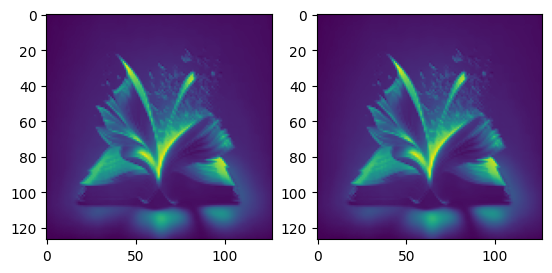

In [348]:
# 1. ReLU Activation

# define the ReLU activation layer
relu = tf.keras.layers.ReLU()

# apply the ReLU activation layer
x_book_relu = relu(x_book_conv)

# print a subset of the output of the ReLU activation layer
print(x_book_relu[0,:5,:5,0])

# show both images
plt.subplot(1, 2, 1)
plt.imshow(x_book_conv[0,:,:,:])
plt.subplot(1, 2, 2)
plt.imshow(x_book_relu[0,:,:,:])
plt.show()

tf.Tensor(
[[0.5052104  0.5054019  0.50598454 0.50680435 0.50745547]
 [0.50573385 0.5062272  0.50598454 0.50715    0.5082807 ]
 [0.5055561  0.5062272  0.50680435 0.50721085 0.5082807 ]
 [0.50608265 0.5062272  0.50715    0.50803614 0.50931984]
 [0.5064423  0.50669754 0.5075069  0.5090133  0.50997245]], shape=(5, 5), dtype=float32)


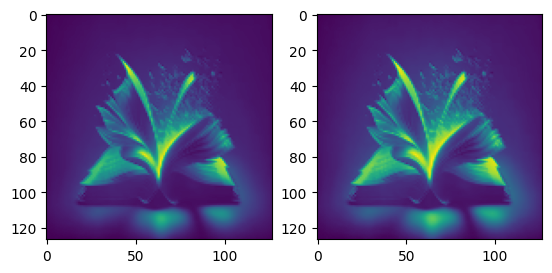

In [349]:
# 2. Sigmoid Activation

# define the Sigmoid activation layer
sigmoid = tf.keras.layers.Activation('sigmoid')

# apply the Sigmoid activation layer
x_book_sigmoid = sigmoid(x_book_conv)

# print a subset of the output of the Sigmoid activation layer
print(x_book_sigmoid[0,:5,:5,0])

# show both images
plt.subplot(1, 2, 1)
plt.imshow(x_book_conv[0,:,:,:])
plt.subplot(1, 2, 2)
plt.imshow(x_book_sigmoid[0,:,:,:])
plt.show()

tf.Tensor(
[[0.02083919 0.02160499 0.02393457 0.02721217 0.02981522]
 [0.02293238 0.02490502 0.02393457 0.0285942  0.03311377]
 [0.02222166 0.02490502 0.02721217 0.02883749 0.03311377]
 [0.02432694 0.02490502 0.0285942  0.03213623 0.03726637]
 [0.02576492 0.02678543 0.03002093 0.03604147 0.039874  ]], shape=(5, 5), dtype=float32)


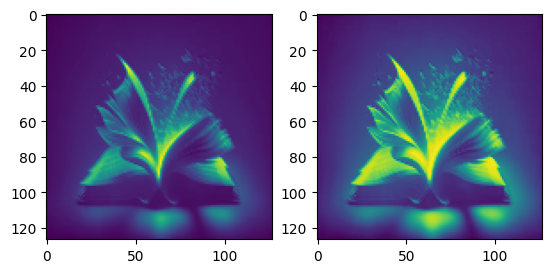

In [350]:
# 3. Tanh Activation

# define the Tanh activation layer
tanh = tf.keras.layers.Activation('tanh')

# apply the Tanh activation layer
x_book_tanh = tanh(x_book_conv)

# print a subset of the output of the Tanh activation layer
print(x_book_tanh[0,:5,:5,0])

# show both images
plt.subplot(1, 2, 1)
plt.imshow(x_book_conv[0,:,:,:])
plt.subplot(1, 2, 2)
plt.imshow(x_book_tanh[0,:,:,:])
plt.show()


## 5. Pooling

conv shape: (1, 127, 127, 1)
pool shape: (1, 63, 63, 1)


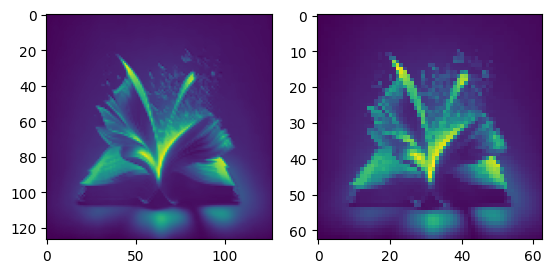

In [354]:
# Max Pooling Layer

# define the max pooling layer
max_pool = tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid')
# pool_size = (2,2) means the pooling window is 2x2
# strides = (2,2) means the pooling window will slide 2 pixels at a time
# padding = valid means no padding

# apply the max pooling layer
x_book_pool = max_pool(x_book_conv)
print("conv shape:", x_book_conv.shape)
print("pool shape:", x_book_pool.shape)


# show both images
plt.subplot(1, 2, 1)
plt.imshow(x_book_conv[0,:,:,:])
plt.subplot(1, 2, 2)
plt.imshow(x_book_pool[0,:,:,:])
plt.show()

# MATH: Max Pooling
# output shape = ((input_shape - pool_shape) / stride) + 1
# here input_shape = (127, 127, 1), pool_shape = (2, 2), stride = 2
# output_shape = ((127 - 2) / 2) + 1 = 63
# so the output shape is (63, 63, 1)

conv shape: (1, 127, 127, 1)
avg pool shape: (1, 63, 63, 1)


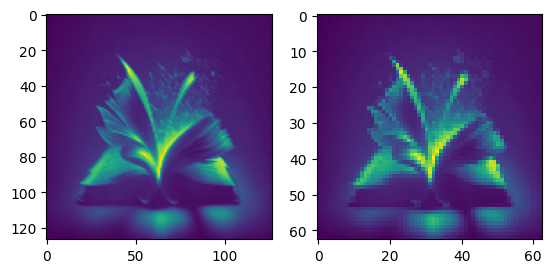

In [355]:
# Average Pooling Layer

# define the average pooling layer
avg_pool = tf.keras.layers.AveragePooling2D(pool_size=(2,2), strides=(2,2), padding='valid')

# apply the average pooling layer
x_book_avg_pool = avg_pool(x_book_conv)
print("conv shape:", x_book_conv.shape)
print("avg pool shape:", x_book_avg_pool.shape)

# show both images
plt.subplot(1, 2, 1)
plt.imshow(x_book_conv[0,:,:,:])
plt.subplot(1, 2, 2)
plt.imshow(x_book_avg_pool[0,:,:,:])
plt.show()

## 6. Flatten

In [357]:
# Flatten Layer is used to convert the 2D output of the convolutional layer to a 1D tensor that can be used as input to a fully connected layer.

# define the flatten layer
flatten = tf.keras.layers.Flatten()

# apply the flatten layer
x_book_flatten = flatten(x_book_conv)
print("conv shape:", x_book_conv.shape)
print("flatten shape:", x_book_flatten.shape)

# MATH: Flatten
# output shape = (batch_size, height * width * channels)
# here input_shape = (1, 127, 127, 1)
# output_shape = (1, 127 * 127 * 1) = (1, 16129)

conv shape: (1, 127, 127, 1)
flatten shape: (1, 16129)


## 7. Dense

In [364]:
# Dense layer is 1 layer of neurons where each neuron is connected to every neuron in the previous layer.

# define the dense layer
dense = tf.keras.layers.Dense(units=64, activation='relu')

# apply the dense layer
x_book_dense = dense(x_book_flatten)
print("flatten shape:", x_book_flatten.shape)
print("dense shape:", x_book_dense.shape)

# MATH: Dense
# output shape = (batch_size, units)
# here units = 64
# output_shape = (1, 64)

# what is outputed from Dense Layer?
# print a subset of the output of the dense layer
print("flatten output:")
print(x_book_flatten[0,:10])
print("dense output:")
print(x_book_dense[0,:10])

# The values in x_book_dense are the outputs of the neurons in the Dense layer. They are calculated by applying the ReLU activation function to the results of the linear operation. The ReLU function outputs the input directly if it is positive, otherwise, it outputs zero. So, the values in x_book_dense are the activated outputs of the Dense layer's neurons.

flatten shape: (1, 16129)
dense shape: (1, 64)
flatten output:
tf.Tensor(
[0.02084221 0.02160836 0.02393915 0.02721889 0.02982406 0.03294883
 0.02727802 0.02356568 0.02828429 0.02958857], shape=(10,), dtype=float32)
dense output:
tf.Tensor(
[0.         0.21639235 0.         0.         0.         0.5832354
 0.         1.681701   0.98346734 0.3181677 ], shape=(10,), dtype=float32)


## 8. Sequential Model

In [366]:
# Build a Sequential Model of layers

# define the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.ZeroPadding2D(padding=(1,2), input_shape=(256, 256, 3)),
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.BatchNormalization(axis=3),
    tf.keras.layers.ReLU(),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=64, activation='relu')  
])

# summarize the model
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 zero_padding2d_35 (ZeroPadd  (None, 258, 260, 3)      0         
 ing2D)                                                          
                                                                 
 conv2d_112 (Conv2D)         (None, 256, 258, 16)      448       
                                                                 
 batch_normalization_43 (Bat  (None, 256, 258, 16)     64        
 chNormalization)                                                
                                                                 
 re_lu_28 (ReLU)             (None, 256, 258, 16)      0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 128, 129, 16)     0         
 2D)                                                             
                                                      

THE End